<a href="https://colab.research.google.com/github/Eduardo-G0nzalez/ev4MachineLearning/blob/main/RandomForest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Modelo Random Forest

## Desarrollo Modelo

🔍 Mejor combinación de parámetros: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_split': 2, 'n_estimators': 200}
✅ Precisión del mejor modelo: 0.6820556153018897

📋 Reporte de clasificación:
               precision    recall  f1-score   support

           0       0.70      0.82      0.75      7770
           1       0.64      0.48      0.55      5248

    accuracy                           0.68     13018
   macro avg       0.67      0.65      0.65     13018
weighted avg       0.68      0.68      0.67     13018



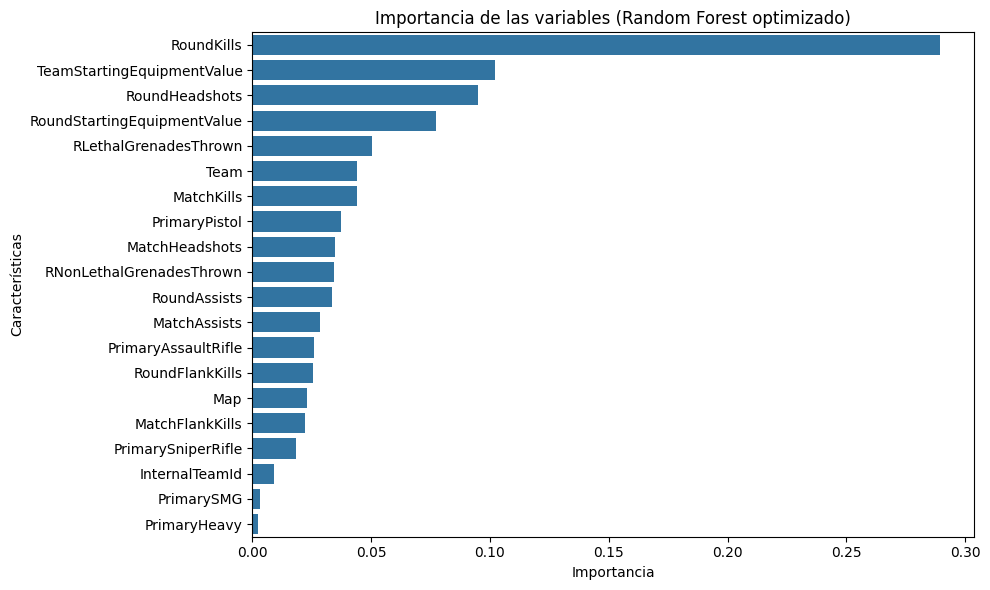

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder

# --- Cargar y preparar los datos ---
df = pd.read_csv("Anexo.csv", sep=";", low_memory=False)

# Eliminar columnas innecesarias
df = df.drop(columns=["Unnamed: 0", "MatchId", "RoundId", "FirstKillTime", "TimeAlive", "TravelledDistance"])

# Codificar columnas categóricas
for col in ["Map", "Team"]:
    df[col] = LabelEncoder().fit_transform(df[col].astype(str))

# Variable objetivo
df["Survived"] = df["Survived"].astype(int)

# Variables predictoras y objetivo
X = df.drop(columns=["Survived", "RoundWinner", "MatchWinner", "AbnormalMatch"])
y = df["Survived"]

# División de los datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# --- Optimización con GridSearchCV ---
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'max_features': ['sqrt', 'log2']
}

rf = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

best_rf = grid_search.best_estimator_

# --- Evaluación del mejor modelo ---
y_pred = best_rf.predict(X_test)
print("🔍 Mejor combinación de parámetros:", grid_search.best_params_)
print("✅ Precisión del mejor modelo:", accuracy_score(y_test, y_pred))
print("\n📋 Reporte de clasificación:\n", classification_report(y_test, y_pred))

# --- Importancia de las variables ---
importances = pd.Series(best_rf.feature_importances_, index=X.columns).sort_values(ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x=importances, y=importances.index)
plt.title("Importancia de las variables (Random Forest optimizado)")
plt.xlabel("Importancia")
plt.ylabel("Características")
plt.tight_layout()
plt.show()

## Interpretación datos obtenidos

- Precisión del modelo (68%): indica un buen rendimiento general, aunque no perfecto. Es coherente para un problema de clasificación como este.      
- Clase 0 (no sobrevivió): tiene mejor recall (82%) que precisión (70%), lo que significa que el modelo detecta bastante bien a los que no sobreviven.   
- Clase 1 (sí sobrevivió): tiene menor recall (48%), lo cual sugiere que el modelo a veces falla en detectar a los sobrevivientes correctamente. Pero aun así logra una f1-score aceptable (0.55).

Importancia de variables (según el gráfico):
- RoundKills es la variable más decisiva. Si matás más, sobrevivís más.
- Le siguen TeamStartingEquipmentValue, RoundHeadshots y RoundStartingEquipmentValue, lo que refuerza la hipótesis: mejor equipamiento → más chances de vivir.
- Otras como RLethalGrenadesThrown y algunas armas específicas también tienen impacto pero menor.
